In [2]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.metrics import accuracy_score, classification_report

# data preprocessing section

training_data = '/content/train.tsv'
valid_data = '/content/valid.tsv'
testing_data = '/content/test.tsv'

# defining the function to clean the text data
def data_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

def load_and_preprocess_data(dataset):
    df = pd.read_csv(dataset, delimiter='\t', header=None, names=[
        'ID', 'label', 'statement', 'subject', 'speaker', "speaker's job title", 'state info', 'party affiliation',
        'total credit history count', 'barely true counts', 'false counts', 'half true counts',
        'mostly true counts', 'pants on fire counts', 'context'])


    df.fillna('Unknown', inplace=True)
    df.drop_duplicates(inplace=True)


    df['processed_statement'] = df['statement'].apply(data_preprocessing)

    return df


train_df = load_and_preprocess_data(training_data)
valid_df = load_and_preprocess_data(valid_data)
test_df = load_and_preprocess_data(testing_data)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Initialise a TF-IDF Vectoriser and fit it on the training data
vectorizer = TfidfVectorizer(max_features=1000)  # limit the number of features to 1000
X_train = vectorizer.fit_transform(train_df['processed_statement']).toarray()

# Transforming the validation and test data using the same vectoriser
X_valid = vectorizer.transform(valid_df['processed_statement']).toarray()
X_test = vectorizer.transform(test_df['processed_statement']).toarray()

# Extract labels
y_train = train_df['label']
y_valid = valid_df['label']
y_test = test_df['label']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.23204419889502761
              precision    recall  f1-score   support

 barely-true       0.26      0.20      0.22       212
       false       0.23      0.26      0.24       249
   half-true       0.24      0.29      0.27       265
 mostly-true       0.22      0.24      0.23       241
  pants-fire       0.11      0.03      0.05        92
        true       0.23      0.23      0.23       208

    accuracy                           0.23      1267
   macro avg       0.21      0.21      0.21      1267
weighted avg       0.23      0.23      0.23      1267

--------------------------------------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.2249408050513023
              precision    recall  f1-score   support

 barely-true       0.27      0.18      0.22       212
       false       0.24      0.30      0.27       249
   half-true       0.23      0.27      0.25       265
 mostly-true       0.19      0.25      0.22 

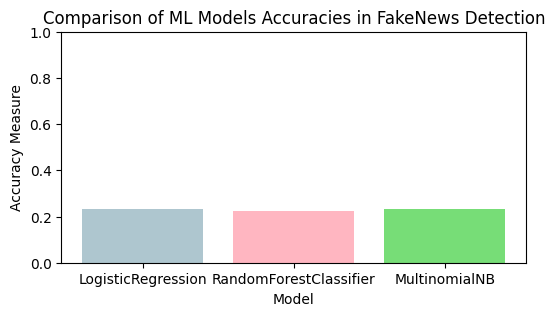

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# initialising the chosen machine learning models

LR = LogisticRegression()
RF = RandomForestClassifier()
MNB = MultinomialNB()

# training the models where x_train means features and y_train means labels

LR.fit(X_train, y_train)
RF.fit(X_train, y_train)
MNB.fit(X_train, y_train)

# evaluating the models and collecting the accuracy of each model

model_accuracies = {}

for model in (LR, RF, MNB):
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    model_accuracies[model.__class__.__name__] = accuracy
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_predict))
    print("-" * 80)

# Plotting
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color=['#aec6cf', '#ffb6c1', '#77dd77'])
plt.xlabel('Model')
plt.ylabel('Accuracy Measure')
plt.title('Comparison of ML Models Accuracies in FakeNews Detection')
plt.ylim([0, 1])
plt.show()

In [5]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

 barely-true       0.23      0.14      0.17       212
       false       0.20      0.25      0.23       249
   half-true       0.24      0.35      0.28       265
 mostly-true       0.24      0.31      0.27       241
  pants-fire       0.00      0.00      0.00        92
        true       0.26      0.18      0.21       208

    accuracy                           0.23      1267
   macro avg       0.20      0.20      0.19      1267
weighted avg       0.22      0.23      0.22      1267

